#**Projetos de Ciência de Dados**


## **Previsão de Preços de Imóveis Utilizando Python: Procedimento Recomendado**

***Abaixo está delineada uma abordagem sistemática para prever os preços de imóveis, projetada para auxiliar na tomada de decisões bem fundamentadas no mercado imobiliário:***

- ***Coleta de Dados:***
Adquire dados pertinentes de diversas fontes, incluindo bancos de dados imobiliários, registros governamentais, listagens online e outras fontes públicas ou privadas disponíveis.

- ***Limpeza e Preparação de Dados:***
Processa os dados coletados tratando valores ausentes, removendo valores atípicos e convertendo variáveis categóricas em representações numéricas, garantindo um conjunto de dados limpo e confiável.

- ***Engenharia de Recursos:***
Cria novos recursos ou modifica os existentes para encapsular informações cruciais capazes de influenciar os preços de imóveis.

- ***Análise Exploratória de Dados:***
Investiga e visualize os dados para extrair insights sobre sua distribuição, correlações e padrões, proporcionando uma compreensão abrangente do conjunto de dados.

- ***Seleção de Modelo:***
Escolha de algoritmos de aprendizado de máquina apropriados ou modelos preditivos adaptados à tarefa específica de previsão de preços de imóveis.

- ***Treinamento do Modelo:***
Treina o modelo selecionado utilizando os dados de treinamento, otimizando seus parâmetros para aprimorar a precisão na realização de previsões confiáveis.

###**Importando as bibliotecas Python necessárias e o conjunto de dados:**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Carrega o conjunto de dados.
real_estate_data = pd.read_csv("/content/data/real_estate.csv")

# Exibe as primeiras linhas do conjunto de dados.
head_real_estate_data = real_estate_data.head()

# Exibe informações sobre o conjunto de dados.
info_real_estate_data = real_estate_data.info()

pd.set_option('display.max_columns', None)  # Exibe todas as colunas sem truncamento.
pd.set_option('display.expand_frame_repr', False)  # Exibir sem quebra de linha.

# Imprime as primeiras linhas e informações do conjunto de dados.
print(f"\nPrimeiras linhas do conjunto de dados:")
display(head_real_estate_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB

Primeiras linhas do conjunto de dados:


,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


>O conjunto de dados abrange um total de 7 colunas, cada uma fornecendo detalhes específicos sobre as transações imobiliárias. São elas:

**(Transaction date) - Data da transação:**
   Esta coluna registra a data exata em que a transação imobiliária ocorreu, oferecendo uma perspectiva cronológica sobre o conjunto de dados.

**(House age) - Idade da casa:**
   Refletindo a idade das casas em anos, esta coluna fornece insights sobre o aspecto temporal das propriedades incluídas no conjunto de dados.

**(Distance to the nearest MRT station) - Distância até a estação MRT mais próxima:**
   Medida em metros, esta coluna indica a proximidade de cada propriedade até a estação de Mass Rapid Transit (MRT) mais próxima, um fator crucial que influencia a acessibilidade.

**(Number of convenience stores) - Número de lojas de conveniência:**
   Esta coluna enumera a quantidade de lojas de conveniência nas proximidades de cada propriedade, oferecendo informações valiosas sobre as comodidades locais disponíveis.

**Latitude:**
   Representando a coordenada geográfica da localização da propriedade, a coluna de latitude adiciona uma dimensão espacial ao conjunto de dados.

**Longitude:**
   Semelhante à coluna de latitude, a coluna de longitude denota a coordenada longitudinal da localização da propriedade, contribuindo para o contexto espacial do conjunto de dados.

**(House price of unit area) - Preço da casa por unidade de área:**
   Esta coluna fornece o preço da casa por unidade de área **(metro quadrado)**, sendo uma métrica fundamental para avaliar os valores das propriedades dentro do conjunto de dados.

>***Cada coluna no conjunto de dados desempenha um papel único em capturar diversas dimensões das transações imobiliárias, abrangendo aspectos temporais, espaciais e econômicos para uma análise mais completa.***

**Padronizando o DataFrame, tornando os nomes das colunas minúsculos e substituindo espaços por underscores.**

In [14]:
# Converte os nomes das colunas para minúsculas e substitue espaços por underscores.
real_estate_data.columns = real_estate_data.columns.str.lower().str.replace(' ', '_')

# Identifica colunas com o tipo de dado 'object'.
string_columns = list(real_estate_data.dtypes[real_estate_data.dtypes == 'object'].index)

# Itera pelas colunas de string e converte para minúsculas e acrescenta underscores.
for col in string_columns:
    real_estate_data[col] = real_estate_data[col].str.lower().str.replace(' ', '_')

In [15]:
real_estate_data.head(5)

,transaction_date,house_age,distance_to_the_nearest_mrt_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012-09-02_16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04_22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05_01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05_13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06_08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


**Verificando se os dados contêm valores nulos ou não:**

In [16]:
print(real_estate_data.isnull().sum())

transaction_date                       0
house_age                              0
distance_to_the_nearest_mrt_station    0
number_of_convenience_stores           0
latitude                               0
longitude                              0
house_price_of_unit_area               0
dtype: int64


>Não há valores nulos no conjunto de dados.

**Visualizando as estatísticas descritivas do conjunto de dados:**

In [17]:
# Estatísticas descritivas do conjunto de dados.
descriptive_stats = real_estate_data.describe()

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(f"\nEstatísticas descritivas do conjunto de dados:")
display(descriptive_stats)


Estatísticas descritivas do conjunto de dados:


,house_age,distance_to_the_nearest_mrt_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


**Histogramas de todos os recursos numéricos no conjunto de dados:**

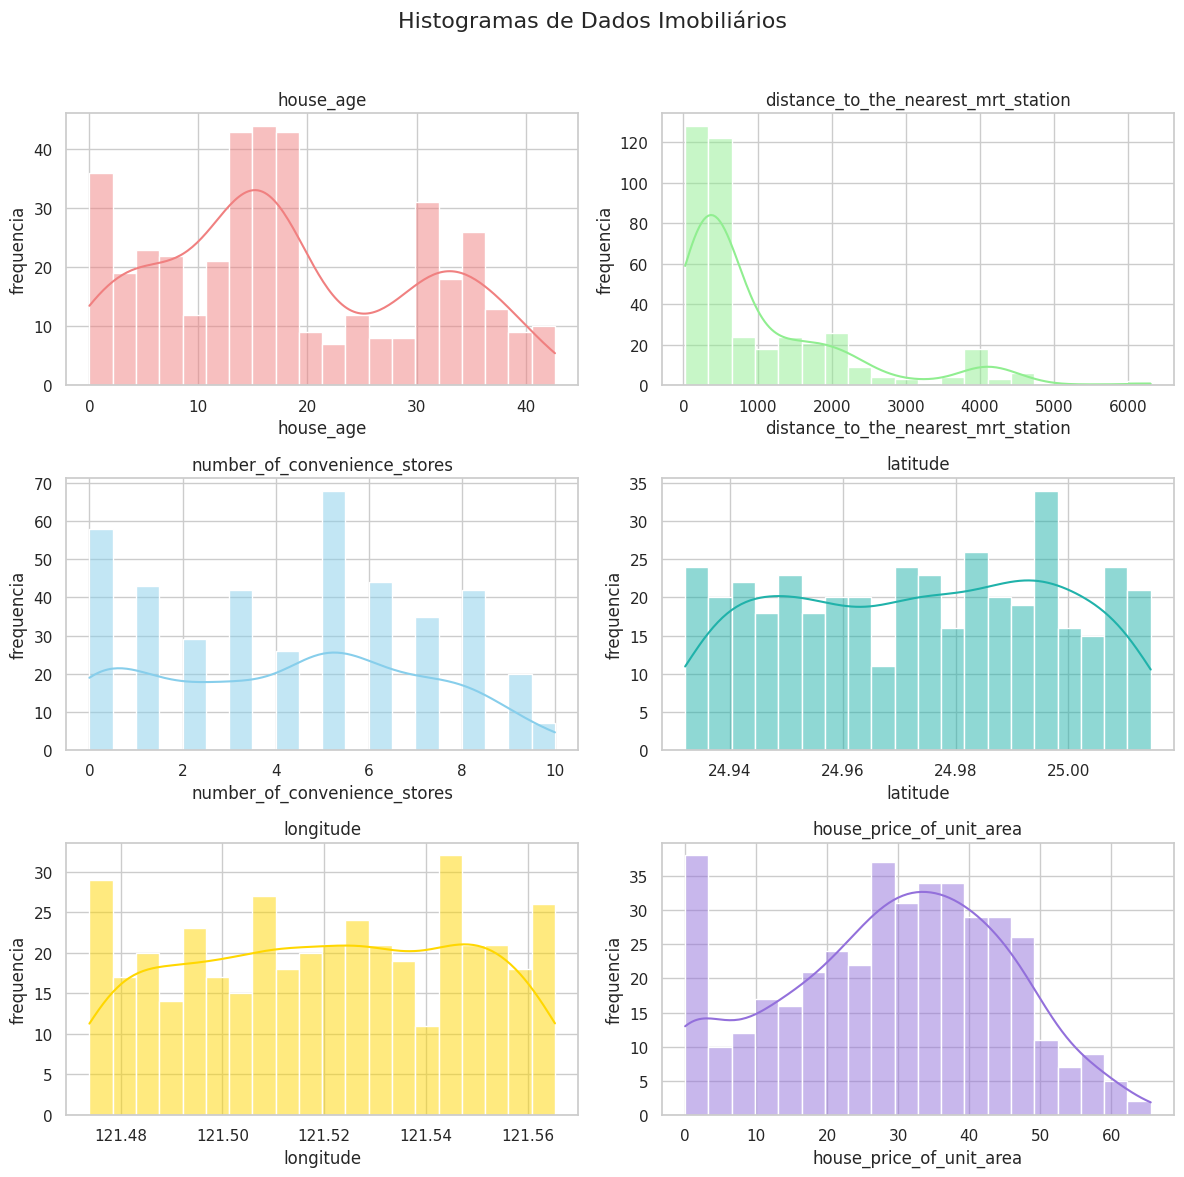

In [18]:
# Define o estilo do fundo dos plots.
sns.set_style("whitegrid")

# Cria histogramas para as colunas numéricas.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histogramas de Dados Imobiliários', fontsize=16)

numerical_columns = ['house_age',	'distance_to_the_nearest_mrt_station',	'number_of_convenience_stores',	'latitude',	'longitude',	'house_price_of_unit_area']

# Define as cores dos plots.
colors = ['lightcoral', 'lightgreen', 'skyblue', 'lightseagreen', 'gold', 'mediumpurple']

for i, col in enumerate(numerical_columns):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i // 2, i % 2], color=colors[i], bins=20)
    axes[i // 2, i % 2].set_title(col)
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].set_ylabel('frequencia')

# Ajusta o layout para melhor espaçamento.
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## Análise de Histograma de Dados Imobiliários

**Histograma 1: Idade da Casa**

* **Distribuição:** A maioria das casas é relativamente nova, com menos de 20 anos de idade. Há um pico na faixa de 10 a 15 anos, indicando um número significativo de casas construídas durante esse período. Existe uma diminuição gradual na frequência de casas mais antigas, com poucas ultrapassando a marca dos 40 anos.

**Histograma 2: Distância para a Estação MRT Mais Próxima**

* **Distribuição:** A maioria das casas está situada relativamente próxima a uma estação MRT, com mais da metade delas a uma distância inferior a 1 km. Há um pico na faixa de 0 a 500 metros, sugerindo que muitas casas estão localizadas em áreas com acesso conveniente ao transporte público. Existe uma diminuição gradual na frequência de casas em distâncias maiores, com apenas algumas ultrapassando 3 km.

**Histograma 3: Número de Lojas de Conveniência**

* **Distribuição:** A maioria das áreas exibe um número moderado de lojas de conveniência, com a maioria delas tendo entre 3 e 5 lojas. Isso indica certas semelhanças quanto à disponibilidade de lojas de conveniência.

**Histogramas 4 e 5: Latitude e Longitude**

* **Distribuição:** A maioria das casas está situada dentro de uma faixa espacial relativamente estreita de latitudes e longitudes, indicando que a maioria das casas está concentrada em uma área geográfica específica.

**Histograma 5: Preço da Casa por Área Unitária**

* **Distribuição:** O preço das casas por unidade de área é altamente assimétrico, com a maioria das casas tendo preços relativamente baixos e uma pequena porcentagem de casas tendo preços muito altos. Há um pico na faixa de 25 a 35 unidades monetárias, significando a faixa de preço mais comum. Existe uma diminuição gradual na frequência de casas com preços mais altos, com apenas algumas casas ultrapassando 50 unidades monetárias.

**Gráficos de dispersão para investigar relações entre determinadas variáveis e os preços das casas. Visando entender quais fatores podem estar exercendo influência mais significativa nos valores imobiliários.**

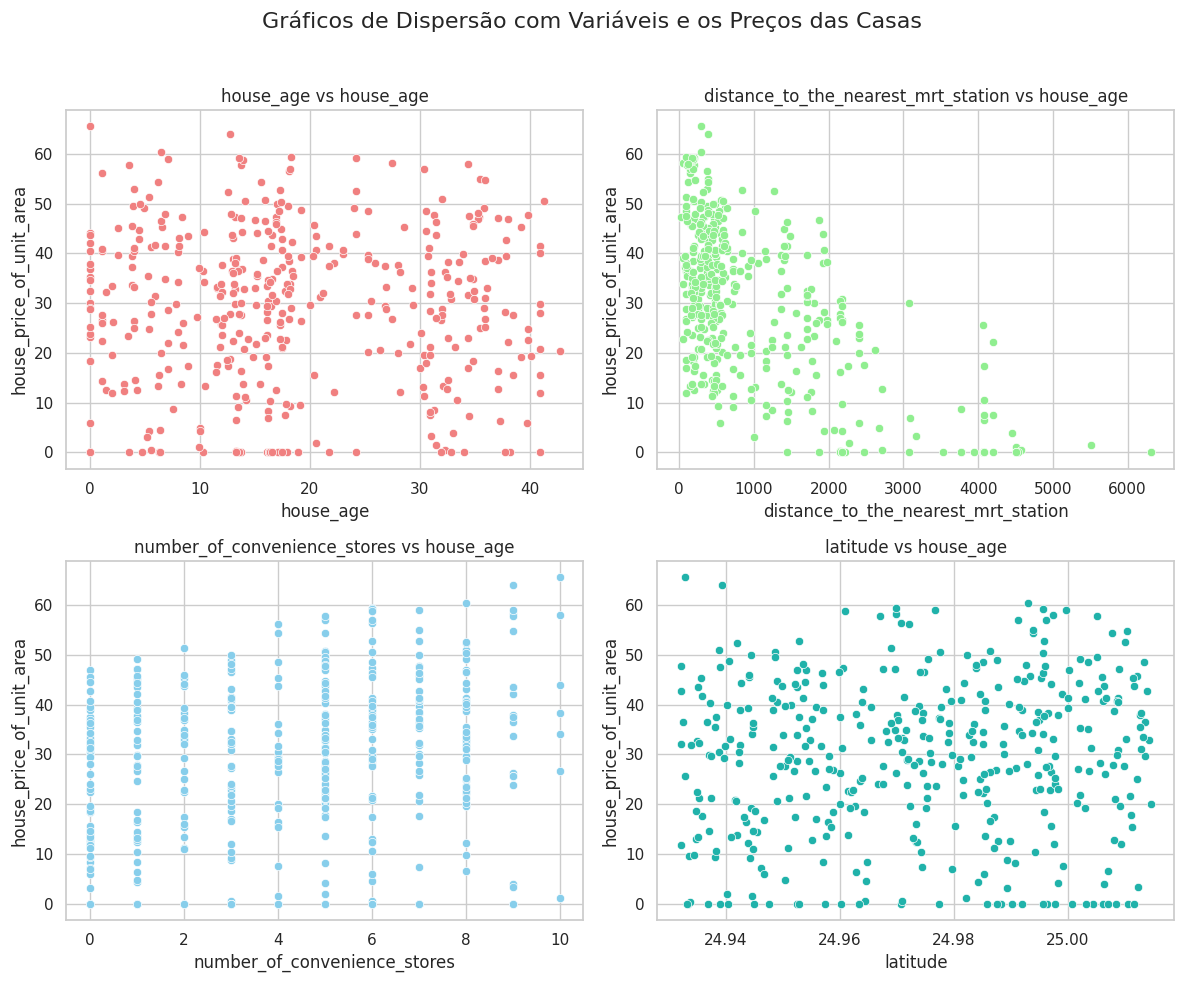

In [19]:
sns.set_style("whitegrid")

# Gráficos de dispersão para observar a relação com o preço da casa.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Gráficos de Dispersão com Variáveis e os Preços das Casas', fontsize=16)

# Define variáveis para gráficos de dispersão.
scatter_variables = ['house_age',	'distance_to_the_nearest_mrt_station',	'number_of_convenience_stores',	'latitude']

colors = ['lightcoral', 'lightgreen', 'skyblue', 'lightseagreen']

for i, col in enumerate(scatter_variables):
    sns.scatterplot(data=real_estate_data, x=col, y='house_price_of_unit_area', ax=axes[i // 2, i % 2], color=colors[i])

    axes[i // 2, i % 2].set_title(f'{col} vs house_age')
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].set_ylabel('house_price_of_unit_area')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## Análise Detalhada dos Gráficos de Dispersão:

**1. Idade da Casa vs. Preço da Casa:**

* **Dispersão:** A dispersão dos pontos é relativamente alta, indicando uma correlação fraca entre a idade da casa e o preço da casa.
* **Observações:**
    * Há uma leve tendência decrescente, com casas mais velhas tendendo a ser mais baratas.
    * Existem vários pontos fora da curva, com casas mais antigas com preços altos e casas mais novas com preços baixos.

**2. Distância à Estação MRT mais Próxima vs. Preço da Casa:**

* **Dispersão:** A dispersão dos pontos é moderada, indicando uma correlação moderada entre a distância à estação MRT e o preço da casa.
* **Observações:**
    * Há uma tendência decrescente clara, com casas mais próximas à estação MRT tendendo a ser mais caras.
    * A dispersão aumenta à medida que a distância da estação MRT aumenta.

**3. Número de Lojas de Conveniência vs. Preço da Casa:**

* **Dispersão:** A dispersão dos pontos é alta, indicando uma correlação fraca entre o número de lojas de conveniência e o preço da casa.
* **Observações:**
    * Não há uma tendência clara, com casas com diferentes números de lojas de conveniência em uma ampla faixa de preços.
    * Alguns pontos fora da curva podem indicar que a presença de lojas de conveniência específicas ou outras características locais podem ter um impacto maior no preço.

**4. Latitude vs. Preço da Casa:**

* **Dispersão:** A dispersão dos pontos é alta, indicando uma correlação fraca entre a latitude e o preço da casa.
* **Observações:**
    * Não há uma tendência clara, com casas em diferentes latitudes em uma ampla faixa de preços.
    * Fatores locais, como características do bairro e acesso a comodidades, provavelmente têm um impacto maior no preço do que a latitude.

>***A análise dos gráficos de dispersão revela que a idade da casa, a distância à estação MRT e o número de lojas de conveniência têm correlações fracas a moderadas com o preço da casa. A latitude não tem uma correlação clara com o preço da casa. Fatores locais, como características do bairro e acesso a co modidades, provavelmente têm um impacto maior no preço do que os fatores representados nos gráficos.***

**Análise de correlação para quantificar os vínculos entre essas variáveis, focando especialmente em como cada uma delas está correlacionada com o preço das casas:**

<ipython-input-20-8988f8d7d8c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = real_estate_data.corr()


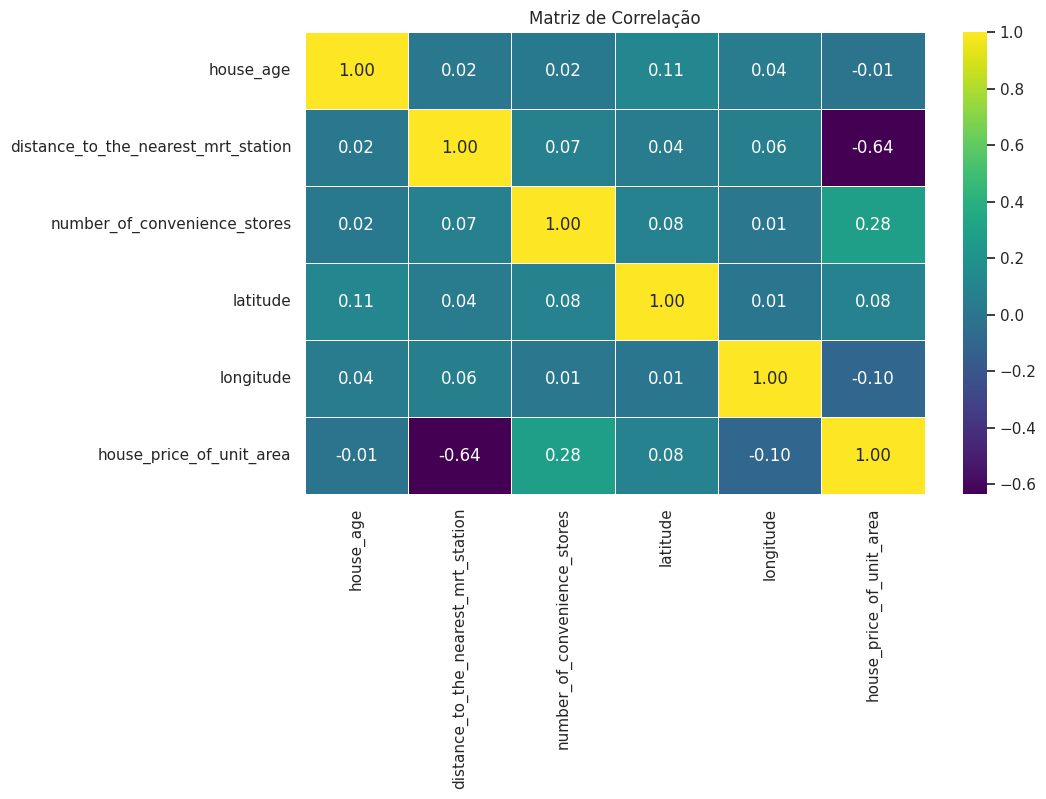


Matriz de correlação:


,house_age,distance_to_the_nearest_mrt_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
house_age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
distance_to_the_nearest_mrt_station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
number_of_convenience_stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
house_price_of_unit_area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


In [20]:
# Matriz de correlação.
correlation_matrix = real_estate_data.corr()

# Define o estilo estético do fundo.
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

print("\nMatriz de correlação:")
display(correlation_matrix)

## Análise da Matriz de Correlação

A matriz de correlação fornecida mostra a força da relação linear entre as variáveis ​​consideradas: idade da casa, distância da estação MRT mais próxima, número de lojas de conveniência, latitude, longitude e preço da casa por unidade de área.

**Observações:**

* **Correlações fortes:**
    * **Idade da casa:** Correlação negativa fraca com o preço da casa por unidade de área (-0.012). Ou seja, neste contexto de dados, a idade não é um forte preditor de preço.
    * **Distância da estação MRT mais próxima:** Correlação negativa forte com o preço da casa por unidade de área (-0,64). Ou seja, casas mais próximas da estação MRT tendem a ser mais caras.
    * **Número de lojas de conveniência:** Correlação positiva moderada com o preço da casa por unidade de área (0,28). Ou seja, casas em áreas com mais lojas de conveniência tendem a ser mais caras.
* **Correlações fracas:** **** neste contexto de dados!***
    * **Idade da casa:** Correlações fracas com as outras variáveis.
    * **Distância da estação MRT mais próxima:** Correlações fracas com latitude e longitude.
    * **Número de lojas de conveniência:** Correlações fracas com latitude e longitude.
    * **Latitude e longitude:** Correlações fracas com o preço da casa por unidade de área.


>***A idade da casa e a distância da estação MRT mais próxima são os principais preditores do preço da casa por unidade de área. O número de lojas de conveniência tem uma influência menor, mas positiva, no preço da casa. Latitude e longitude não têm uma correlação significativa com o preço da casa neste contexto de dados.***

## **Modelo de regressão para prever os valores dos imóveis utilizando o algoritmo de regressão linear:**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecionando recursos e variável de destino.
selected_features = ['distance_to_the_nearest_mrt_station',	'number_of_convenience_stores',	'latitude',	'longitude']
target_variable = 'house_price_of_unit_area'

X = real_estate_data[selected_features]
y = real_estate_data[target_variable]

# Dividindo o conjunto de dados em conjuntos de treino e teste.
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Inicialização do modelo.
model = LinearRegression()

try:
    # Treinando o modelo.
    model.fit(X_train, y_train)
    print("Treinamento de modelo bem-sucedido!")

    # Fazendo previsões no conjunto de testes.
    y_pred = model.predict(X_test)

    # Avaliando o modelo.
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
    print("\n")

except Exception as e:
    print(f"Erro durante o treinamento do modelo: {str(e)}")

Treinamento de modelo bem-sucedido!
Mean Squared Error: 124.58
R-squared: 0.55




## Análise do Modelo de Regressão

* **Erro Quadrático Médio (MSE):** 124.58
* **R-quadrado (R²):** 0.55

>
>

**Análise do MSE - Ou Erro Quadrático Médio**

O MSE de 124.58 indica que, em média, os preços previstos pelo modelo estão 124.58 unidades monetárias distantes dos preços reais. Isso significa que o modelo apresenta
previsões relativamente imprecisas para uma parcela substancial do conjunto de testes.

**Análise do R²**

O R² de 0.55 indica que 55% da variabilidade nos preços reais das casas é explicada pelas variáveis ​​incluídas no modelo. Isso significa que 45% da variabilidade nos preços reais das casas não é explicada pelo modelo e pode ser atribuída a outros fatores não considerados pelo modelo. Portanto, sugere que há espaço para melhorias na precisão do modelo.

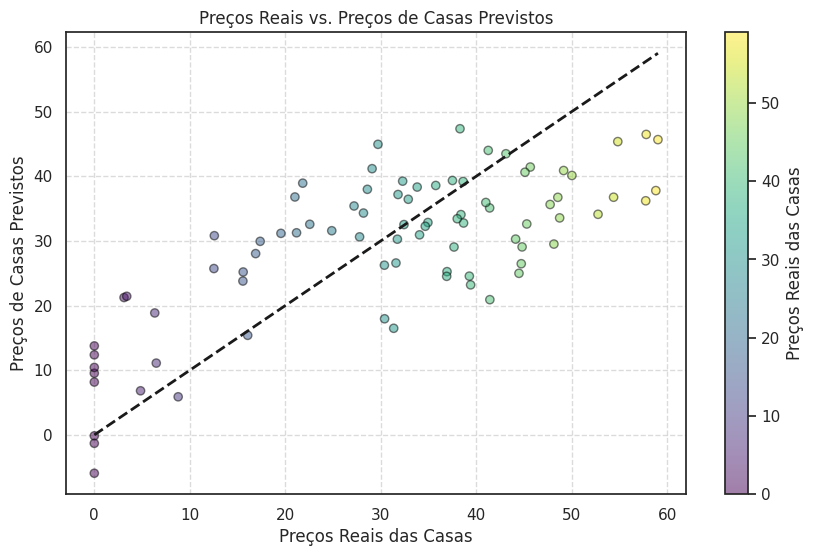

In [22]:
# Fazendo previsões usando o modelo de regressão linear.
y_pred_lr = model.predict(X_test)

# Visualização: valores reais vs. valores previstos.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred_lr, alpha=0.5, c=y_test, cmap='viridis', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Preços Reais vs. Preços de Casas Previstos')
plt.xlabel('Preços Reais das Casas')
plt.ylabel('Preços de Casas Previstos')
plt.colorbar(scatter, label='Preços Reais das Casas', orientation='vertical')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Análise do Gráfico de Dispersão**

O gráfico de dispersão mostra a relação entre os preços reais e os preços previstos das casas. A maioria dos pontos está próxima da linha de regressão, o que indica que existe uma correlação positiva entre as duas variáveis. No entanto, também existem alguns pontos que estão distantes da linha de regressão, o que indica que o modelo não é perfeito e que existem erros nas previsões.

>

**Conclusão**

Com base na análise das métricas e do gráfico de dispersão, conclui-se que o modelo de regressão é capaz de explicar uma parte significativa da variabilidade nos preços reais das casas. No entanto, ainda existe um erro considerável nas previsões do modelo. Para melhorar a precisão do modelo, é necessário coletar mais dados, incluir mais variáveis ​​no modelo e/ou utilizar um modelo mais complexo.